# Solving a differential equation with SageMath

In [1]:
version()

'SageMath version 8.2.rc2, Release Date: 2018-04-10'

In [2]:
%display latex

## Exact solutions: `desolve`

In [3]:
x = var('x')
y = function('y')(x)
y

In [4]:
eq = diff(y, x) - y == x*y^4
eq

In [5]:
print(eq)

-y(x) + diff(y(x), x) == x*y(x)^4


In [6]:
desolve(eq, y)

In [7]:
print(desolve(eq, y))

e^x/(-1/3*(3*x - 1)*e^(3*x) + _C)^(1/3)


In [8]:
desolve(eq, y, show_method='True')

In [9]:
desolve(eq, y, ics=[0, 2])

In [10]:
f(x) = desolve(eq, y, ics=[0, 2])
diff(f(x), x) - f(x) - x*f(x)^4

In [11]:
z = diff(f(x), x) - f(x) - x*f(x)^4
z

In [12]:
z = diff(f(x), x) - f(x) - x*f(x)^4

In [13]:
z.simplify_full()

In [14]:
f(0)

## System of differential equations

In [15]:
y1 = function('y_1')(x)
y2 = function('y_2')(x)
y3 = function('y_3')(x)
y = vector([y1, y2, y3])
y

In [16]:
A = matrix([[2,-2,0], [-2,0,2], [0,2,2]])
A

In [17]:
eqs = [diff(y[i],x) == (A*y)[i] for i in range(3)]
eqs

In [18]:
for eq in eqs:
    show(eq)

In [19]:
sol = desolve_system(eqs, [y1,y2,y3], ics=[0, 2, 1, -2])
sol

## Numerical solutions

In [20]:
rho = function('rho', latex_name=r'\rho')
p = function('p')
m = function('m')
Phi = function('Phi', latex_name=r'\Phi')
r = var('r')
G = var('G')

In [21]:
eq1 = diff(m(r), r) == 4*pi*r^2*rho(r)
eq2 = diff(Phi(r), r) == G*m(r)/r^2
eq3 = diff(p(r), r) == -rho(r)*G*m(r)/r^2
for eq in [eq1, eq2, eq3]:
    show(eq)

In [22]:
k = var('k')
gam = var('gam', latex_name=r'\gamma')
p_eos(r) = k*rho(r)^gam
p_eos(r)

In [23]:
eq3_rho = eq3.substitute_function(p, p_eos)
eq3_rho

In [24]:
eq3_rho = (eq3_rho / (gam*k*rho(r)^(gam-1))).simplify_full()
eq3_rho

In [25]:
eqs = [eq1, eq2, eq3_rho]
for eq in eqs:
    show(eq)

In [26]:
k0 = 1/4
gam0 = 2
rhs = [eq.rhs().subs({k: k0, gam: gam0, G: 1}) for eq in eqs]
rhs

In [27]:
rhs[0] = rhs[0] * unit_step(rho(r))
rhs[2] = rhs[2] * unit_step(rho(r))
rhs

In [28]:
rhs.append(1 * unit_step(rho(r)))
rhs

In [29]:
var('m_1 Phi_1 rho_1 r_1')
rhs = [y.subs({m(r): m_1, Phi(r): Phi_1, rho(r): rho_1}) for y in rhs]
rhs

In [30]:
rho_c = 1
r_min = 1e-8
r_max = 1
np = 200
delta_r = (r_max - r_min) / (np-1)

In [47]:
sol = desolve_system_rk4(rhs, vars=(m_1, Phi_1, rho_1, r_1), ivar=r, 
                         ics=[r_min, 0, 0, rho_c, r_min], 
                         end_points=r_max, step=delta_r)


In [48]:
delta_r

In [49]:
sol[:10]

In [50]:
rho_sol = [(s[0], s[3]) for s in sol]
rho_sol[:10]

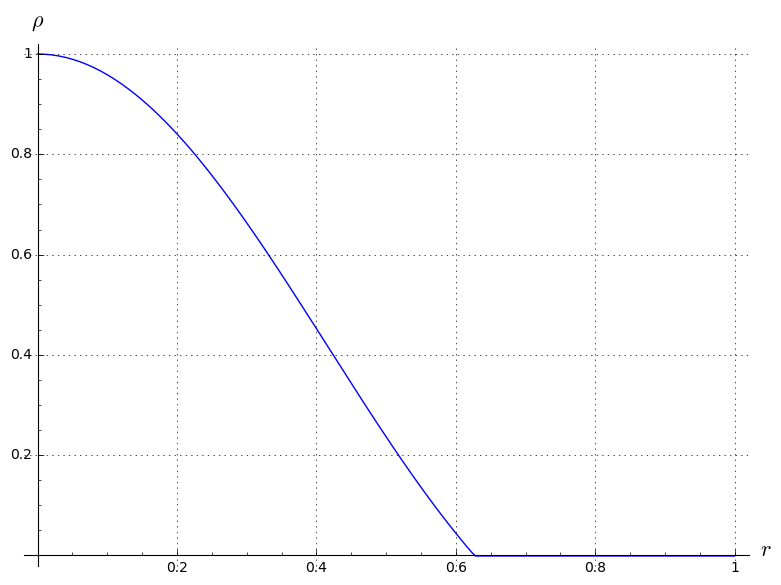

In [51]:
graph = line(rho_sol, axes_labels=[r'$r$', r'$\rho$'], gridlines=True)
graph

In [52]:
Phi_sol = [(s[0], s[2]) for s in sol]
Phi_sol[:10]

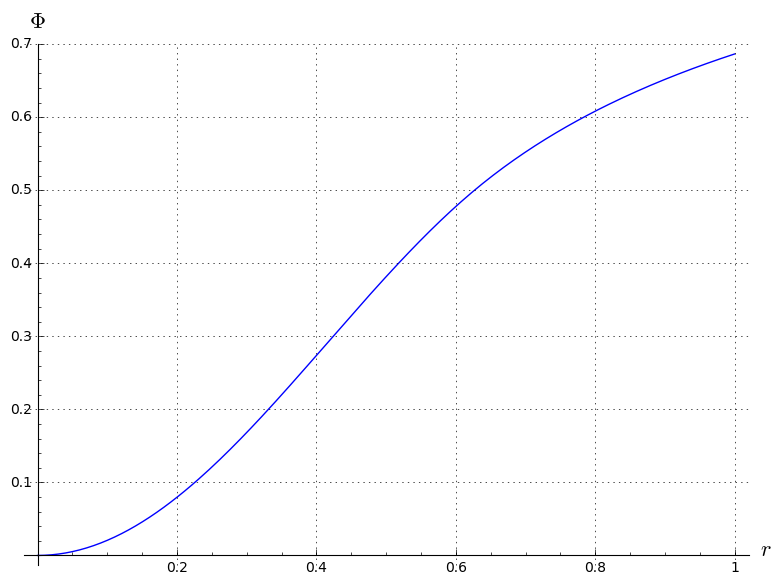

In [53]:
graph = line(Phi_sol, axes_labels=[r'$r$', r'$\Phi$'], gridlines=True)
graph

In [54]:
M = Manifold(2, 'M')
print(M)

2-dimensional differentiable manifold M


In [55]:
X.<x,y> = M.chart()

In [56]:
X

In [57]:
v = 2*x*X.frame()[0] - X.frame()[1]

In [58]:
v.display()

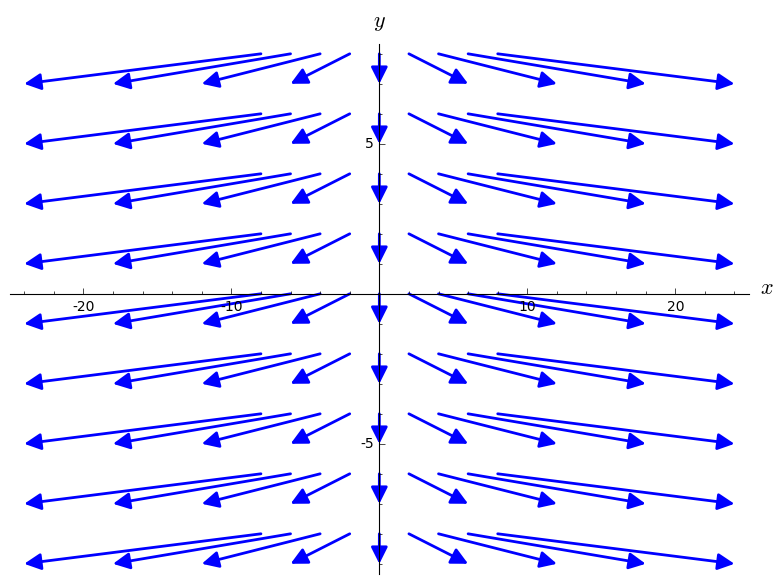

In [59]:
v.plot()

In [60]:
import numpy as np

In [61]:
z = cos(x).series(x, 8)

In [62]:
z.operands()

In [0]:
z?